In [1]:
# Time Series Analysis of Atmospheric CO₂ Data
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.datasets import co2


In [2]:
# Load dataset from statsmodels
data = co2.load_pandas().data

In [3]:
# Ensure DateTime index
data = data.to_period('D')  # convert to daily period index
data = data.to_timestamp()  # convert back to datetime for resampling
data = data.rename(columns={'co2': 'CO2'})  # rename column for clarity

In [4]:
print("Raw Data Sample:")
print(data.head())

Raw Data Sample:
              CO2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


In [5]:
# 2. Handle Missing Values
# -------------------------------
# Count missing values
print("\nMissing values:", data['CO2'].isna().sum())


Missing values: 59


In [6]:
# Fill missing values with forward fill, then backward fill as backup
data['CO2'] = data['CO2'].ffill().bfill()

In [7]:
# Count missing values
print("\nMissing values:", data['CO2'].isna().sum())


Missing values: 0


In [8]:
# 3. Resample and Aggregate Data
# -------------------------------
# Convert daily values into monthly averages
co2_monthly = data['CO2'].resample('M').mean()

In [9]:
print("\nMonthly Data Sample:")
print(co2_monthly.head())


Monthly Data Sample:
1958-03-31    316.100
1958-04-30    317.200
1958-05-31    317.420
1958-06-30    317.900
1958-07-31    315.625
Freq: M, Name: CO2, dtype: float64


In [10]:
# 4. Slice and Extract Specific Periods
# -------------------------------
# Example: Extract data for the 1990s
co2_1990s = co2_monthly['1990-01-01':'1999-12-31']

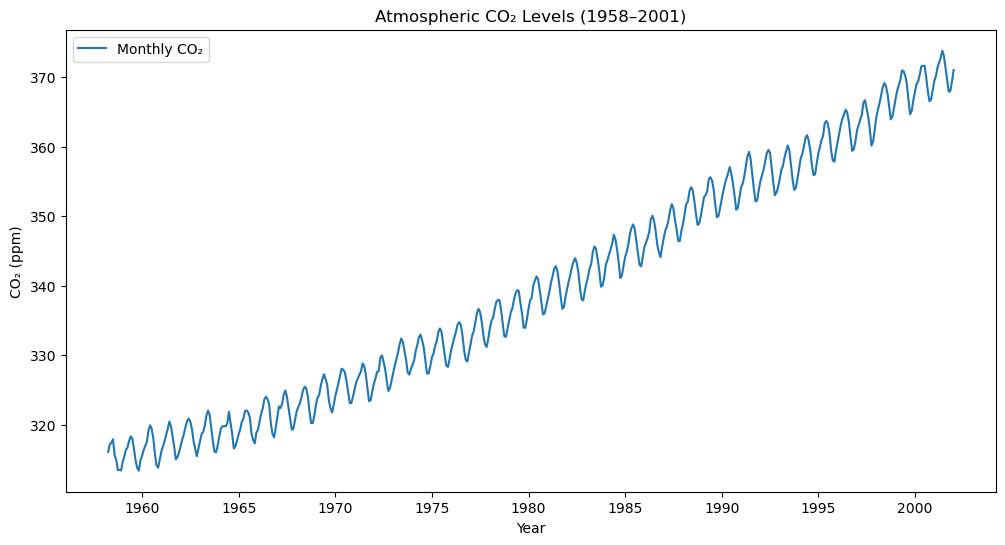

In [11]:
# 5. Visualize Data Trends
# -------------------------------
plt.figure(figsize=(12,6))
plt.plot(co2_monthly, label="Monthly CO₂")
plt.title("Atmospheric CO₂ Levels (1958–2001)")
plt.xlabel("Year")
plt.ylabel("CO₂ (ppm)")
plt.legend()
plt.show()

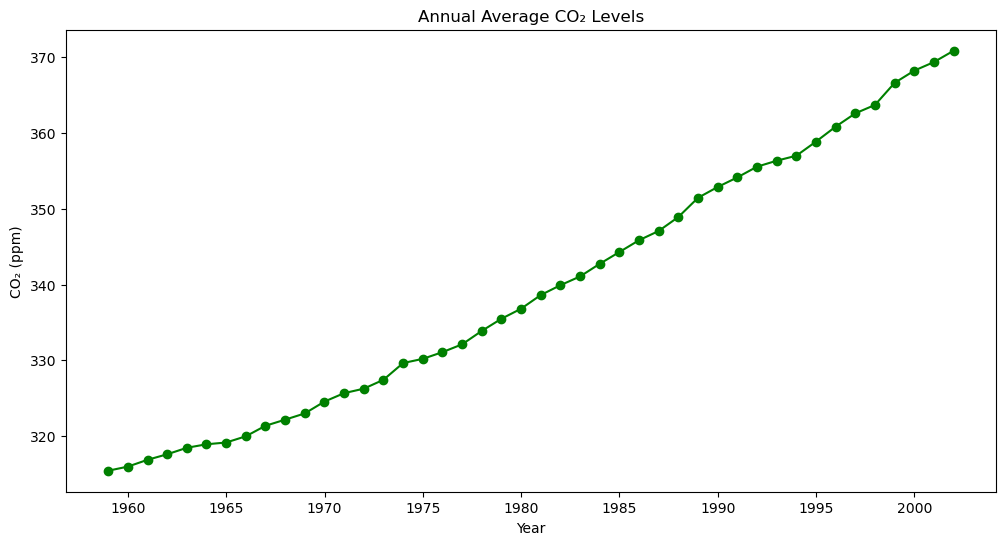

In [12]:
# Dot plot (annual averages)
co2_annual = co2_monthly.resample('A').mean()
plt.figure(figsize=(12,6))
plt.plot(co2_annual.index, co2_annual.values, 'o-', color='green')
plt.title("Annual Average CO₂ Levels")
plt.xlabel("Year")
plt.ylabel("CO₂ (ppm)")
plt.show()

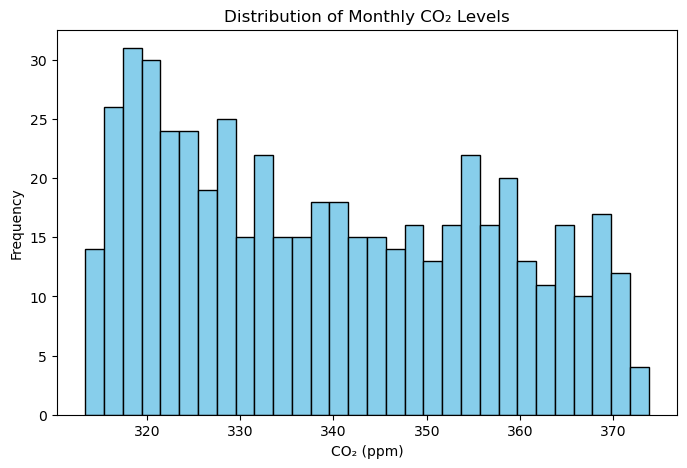

In [13]:
# Histogram
plt.figure(figsize=(8,5))
plt.hist(co2_monthly.dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Monthly CO₂ Levels")
plt.xlabel("CO₂ (ppm)")
plt.ylabel("Frequency")
plt.show()

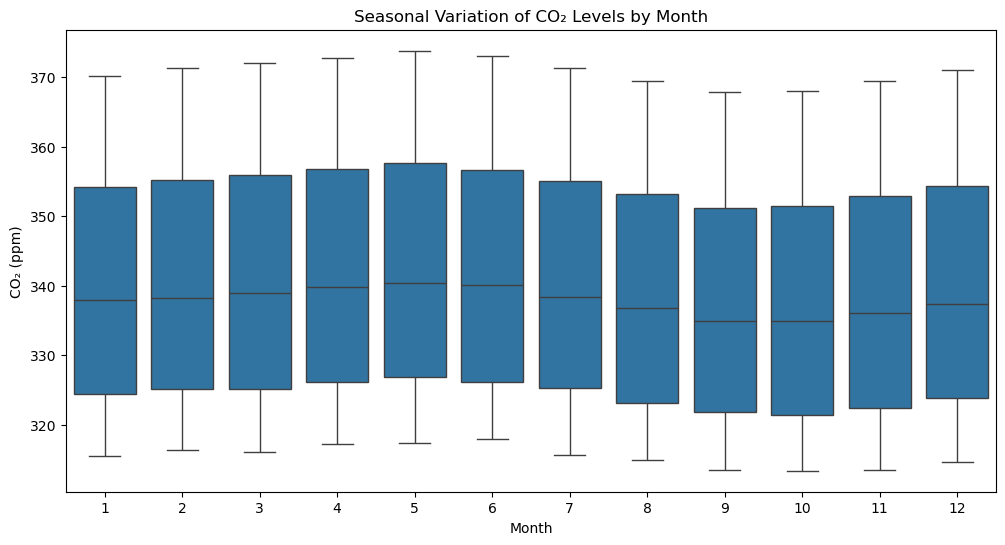

In [14]:
# 6. Seasonal Variations & Distributions
# -------------------------------
# Boxplot by month (seasonality)
co2_monthly_df = co2_monthly.to_frame()
co2_monthly_df['Month'] = co2_monthly_df.index.month

plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='CO2', data=co2_monthly_df)
plt.title("Seasonal Variation of CO₂ Levels by Month")
plt.xlabel("Month")
plt.ylabel("CO₂ (ppm)")
plt.show()